# Python 2

http://www.pitt.edu/~naraehan/presentation/word2vec-try.html



In [5]:
# If not installed yet, run
! pip install six==1.10.0
! pip install matplotlib==2.0.2
! pip install nltk --user

# Then restart kernel

  Found existing installation: six 1.11.0
    Uninstalling six-1.11.0:
      Successfully uninstalled six-1.11.0
    100% |████████████████████████████████| 12.8MB 1.7MB/s ta 0:00:011
  Found existing installation: matplotlib 2.2.2
    Uninstalling matplotlib-2.2.2:
      Successfully uninstalled matplotlib-2.2.2


In [1]:
import sys
sys.version_info

sys.version_info(major=2, minor=7, micro=15, releaselevel='final', serial=0)

In [4]:
#  Turns on/off pretty printing 
%pprint

# Every returned Out[] is displayed, not just the last one. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Pretty printing has been turned OFF


In [5]:
# Import Word2Vec from gensim. 
# gensim is not installed system-wide. Install for yourself: pip install gensim --user
from gensim.models import Word2Vec

In [6]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]

In [7]:
import nltk
nltk.download('punkt')

/Users/jorismattheijssens/Library/Python/2.7/lib/python/site-packages/sklearn/feature_extraction/hashing.py:10: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _hashing
/usr/local/lib/python2.7/site-packages/scipy/io/matlab/mio4.py:18: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .mio_utils import squeeze_element, chars_to_strings
/usr/local/lib/python2.7/site-packages/scipy/io/matlab/mio5.py:98: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .mio5_utils import VarReader5
/Users/jorismattheijssens/Library/Python/2.7/lib/python/site-packages/sklearn/datasets/svmlight_format.py:25: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._svmlight_format import _load_svmlight_file


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jorismattheijssens/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
from nltk import word_tokenize

mary = """Mary had a little lamb,
His fleece was white as snow,
And everywhere that Mary went,
The lamb was sure to go.
"Why does the lamb love Mary so?"
The eager children cry.
"Why, Mary loves the lamb, you know."
The teacher did reply."""

sentences = [word_tokenize(s) for s in mary.lower().split('\n')]
sentences

[['mary', 'had', 'a', 'little', 'lamb', ','], ['his', 'fleece', 'was', 'white', 'as', 'snow', ','], ['and', 'everywhere', 'that', 'mary', 'went', ','], ['the', 'lamb', 'was', 'sure', 'to', 'go', '.'], ['``', 'why', 'does', 'the', 'lamb', 'love', 'mary', 'so', '?', "''"], ['the', 'eager', 'children', 'cry', '.'], ['``', 'why', ',', 'mary', 'loves', 'the', 'lamb', ',', 'you', 'know', '.', "''"], ['the', 'teacher', 'did', 'reply', '.']]

In [9]:
# train model
model = Word2Vec(sentences, min_count=1)

# summarize the loaded model
print(model)

Word2Vec(vocab=37, size=100, alpha=0.025)


In [10]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)

['and', 'the', 'love', ',', "''", 'as', 'his', 'go', 'children', 'lamb', 'little', 'eager', 'had', 'snow', '.', 'to', 'does', 'reply', 'white', 'was', 'mary', '?', '``', 'sure', 'that', 'why', 'you', 'everywhere', 'know', 'teacher', 'a', 'fleece', 'did', 'cry', 'so', 'loves', 'went']


In [11]:
# access vector for one word
#print(model['sentence'])
print(model['lamb'])

[-3.7199850e-03 -1.5619427e-03 -6.5460504e-04  4.9593211e-03
 -4.1542528e-03  1.1460396e-03  3.0052415e-03  3.0263879e-03
  4.1007018e-03  2.2437887e-03 -5.1785470e-04  4.7115660e-03
 -3.9365338e-04  3.9646872e-03 -3.5997930e-03  4.3536731e-04
 -2.6000903e-03 -1.3124591e-04  3.1145629e-03  8.8482618e-04
  3.1172172e-03 -1.3854009e-03 -1.0119198e-03 -1.6989673e-03
 -4.8220721e-03  2.3143182e-03 -2.2556095e-03 -1.1932991e-03
 -3.7101738e-03 -9.5351279e-04  1.7353039e-03  4.0756897e-03
  1.7581044e-03  2.0633519e-03  4.2566527e-03 -2.9781326e-03
  2.0146137e-03 -4.0181815e-03 -2.2331355e-03  7.0527918e-04
 -5.3711433e-04 -4.8063560e-03  4.1260151e-03 -4.5455927e-03
 -3.2648393e-03  9.1876648e-04  2.1398369e-04 -2.6425294e-04
  4.5313756e-04  1.9475402e-03 -3.5850864e-03 -3.9761709e-03
 -4.2869072e-04 -3.6577221e-03  3.6480776e-03 -2.2843827e-03
 -1.7434122e-03  4.5239232e-03  3.5984269e-03  4.9494165e-03
 -3.5531644e-03 -3.0492260e-03  1.5761900e-03  1.0656569e-03
  2.2510642e-03 -2.08199

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# save model
model.save('model.bin')

In [13]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=37, size=100, alpha=0.025)


In [14]:
dir(model)

['__class__', '__contains__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__getitem__', '__hash__', '__ignoreds', '__init__', '__module__', '__new__', '__numpys', '__recursive_saveloads', '__reduce__', '__reduce_ex__', '__repr__', '__scipys', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_adapt_by_suffix', '_check_training_sanity', '_clear_post_train', '_do_train_job', '_get_job_params', '_get_thread_working_mem', '_job_producer', '_load_specials', '_log_epoch_end', '_log_epoch_progress', '_log_progress', '_log_train_end', '_minimize_model', '_raw_word_count', '_save_specials', '_set_train_params', '_smart_save', '_train_epoch', '_update_job_params', '_worker_loop', 'accuracy', 'alpha', 'batch_words', 'build_vocab', 'build_vocab_from_freq', 'callbacks', 'cbow_mean', 'clear_sims', 'compute_loss', 'corpus_count', 'cum_table', 'delete_temporary_training_data', 'doesnt_match', 'epochs', 'estimate_memory', 'evaluate

In [15]:
model.wv.vocab

{'and': <gensim.models.keyedvectors.Vocab object at 0x113700250>, 'the': <gensim.models.keyedvectors.Vocab object at 0x1139730d0>, 'love': <gensim.models.keyedvectors.Vocab object at 0x113700050>, ',': <gensim.models.keyedvectors.Vocab object at 0x11370da90>, "''": <gensim.models.keyedvectors.Vocab object at 0x113700410>, 'as': <gensim.models.keyedvectors.Vocab object at 0x113700390>, 'his': <gensim.models.keyedvectors.Vocab object at 0x11370dd50>, 'go': <gensim.models.keyedvectors.Vocab object at 0x11370d7d0>, 'children': <gensim.models.keyedvectors.Vocab object at 0x11370da50>, 'lamb': <gensim.models.keyedvectors.Vocab object at 0x11370da10>, 'little': <gensim.models.keyedvectors.Vocab object at 0x11370d950>, 'eager': <gensim.models.keyedvectors.Vocab object at 0x11370d990>, 'had': <gensim.models.keyedvectors.Vocab object at 0x11370d890>, 'snow': <gensim.models.keyedvectors.Vocab object at 0x113700350>, '.': <gensim.models.keyedvectors.Vocab object at 0x11370dad0>, 'to': <gensim.mode

## Visualization through PCA (principal component analysis)


In [16]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


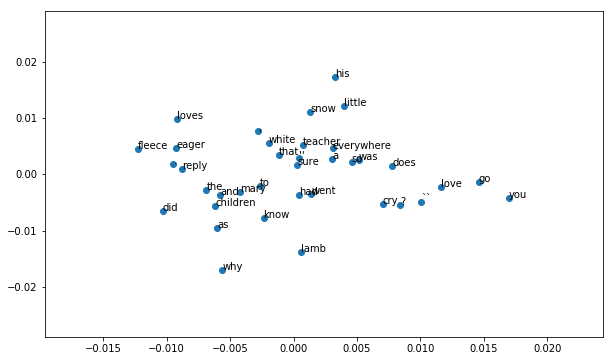

In [19]:
pyplot.rcParams['figure.figsize'] = (10, 6)

# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)

for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


## Load Google's pre-trained word2vec embedding

    Good news! I have already downloaded the model file and saved it in our shared_data folder on h2p.



In [22]:
from gensim.models import KeyedVectors

filename = '/Users/jorismattheijssens/Downloads/GoogleNews-vectors-negative300.bin.gz'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)
# works! 


/Users/jorismattheijssens/Library/Python/2.7/lib/python/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(u'queen', 0.7118192911148071)]


In [23]:
result = model.most_similar(positive=['woman', 'actor'], negative=['man'], topn=1)
print(result)
# works again!

[(u'actress', 0.860262393951416)]


In [24]:
result = model.most_similar(positive=['dog', 'kitten'], negative=['baby'], topn=1)
print(result)
# fail. Seems 100 billion words of news data weren't enough to learn about kittens and puppies... 

[(u'dogs', 0.7231072783470154)]



## Load Stanford's pre-trained GloVe embedding

    Again, the model files are already downloaded in the shared_data folder.


In [26]:
# GloVe file format must be first convertd to Word2Vec format
# Something that needs to be done ONCE: you guys don't need to do this! 

from gensim.scripts.glove2word2vec import glove2word2vec

# vdir = '/ihome/pyling/shared_data/word_vectors/'
vdir = '/Users/jorismattheijssens/Downloads/glove.6B/'
glove_input_file = vdir + 'glove.6B.100d.txt'
word2vec_output_file = vdir + 'glove.6B.100d.txt.word2vec'

glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [27]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = vdir + 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[(u'queen', 0.7698541283607483)]


In [28]:
result = model.most_similar(positive=['dog', 'kitten'], negative=['baby'], topn=1)
print(result)
# Woo hoo! 6 billion words of Wikipedia --> successful learning of kitten and puppy. 

[(u'puppy', 0.6481586694717407)]


In [29]:
result = model.most_similar(positive=['pittsburgh', 'eagles'], negative=['philadelphia'], topn=5)
print(result)
# Beautiful! 

[(u'steelers', 0.7623487710952759), (u'vikings', 0.7566234469413757), (u'falcons', 0.7381411790847778), (u'panthers', 0.7375525236129761), (u'broncos', 0.735093355178833)]


In [30]:
result = model.most_similar(positive=['turtle', 'snail'], negative=['shell'], topn=5)
print(result)
# Hmm...

[(u'wildflower', 0.6302021741867065), (u'turtles', 0.5460652112960815), (u'cichlid', 0.5293101668357849), (u'songbird', 0.5284878611564636), (u'tortoises', 0.5175418257713318)]


In [31]:
result = model.most_similar(positive=['cow', 'pork'], negative=['pig'], topn=5)
print(result)
# Yayy! 

[(u'beef', 0.7819944620132446), (u'meat', 0.689876914024353), (u'chicken', 0.5895066857337952), (u'poultry', 0.5763587951660156), (u'meats', 0.5711966753005981)]


In [32]:
result = model.most_similar(positive=['michelle', 'barack'], negative=['bush'], topn=5)
print(result)
# Huh! Is it because Laura Bush is still a Bush? 
# But George is not a very distinctive first name, and we can't do George W. 

[(u'sasha', 0.6619372963905334), (u'sarah', 0.6275115609169006), (u'julia', 0.6156177520751953), (u'malia', 0.6076964139938354), (u'jessica', 0.6059255003929138)]
